In [1]:
!pip install datasets

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd # Import pandas to work with DataFrames

In [4]:
pip install ipywidgets --upgrade


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
from datasets import load_dataset

# load dataset
dataset = load_dataset('unimelb-nlp/wikiann', 'en')

# show structure (first 5 entries of training set)
print(dataset['train'][:5])

{'tokens': [['R.H.', 'Saunders', '(', 'St.', 'Lawrence', 'River', ')', '(', '968', 'MW', ')'], [';', "'", "''", 'Anders', 'Lindström', "''", "'"], ['Karl', 'Ove', 'Knausgård', '(', 'born', '1968', ')'], ['Atlantic', 'City', ',', 'New', 'Jersey'], ['Her', 'daughter', 'from', 'the', 'second', 'marriage', 'was', 'Marie', "d'Agoult", '(', '1805–1876', ')', ',', 'who', 'in', 'turn', 'gave', 'birth', 'to', 'several', 'children', ',', 'among', 'them—from', 'her', 'liaison', 'to', 'Franz', 'Liszt', '–-', 'Cosima', 'Wagner', '(', '1837–1930', ')', '.']], 'ner_tags': [[3, 4, 0, 3, 4, 4, 0, 0, 0, 0, 0], [0, 0, 0, 1, 2, 0, 0], [1, 2, 2, 0, 0, 0, 0], [5, 6, 6, 6, 6], [0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 0, 0, 0, 0]], 'langs': [['en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en'], ['en', 'en', 'en', 'en', 'en', 'en', 'en'], ['en', 'en', 'en', 'en', 'en', 'en', 'en'], ['en', 'en', 'en', 'en', 'en'], ['en', 'en', 'en', 'en', 'en

In [6]:
# Convert the dataset to a pandas DataFrame
df = pd.DataFrame(dataset['train']) # Create a DataFrame named df

df.head() # Now you can call head() on df


,tokens,ner_tags,langs,spans
0,"[R.H., Saunders, (, St., Lawrence, River, ), (...","[3, 4, 0, 3, 4, 4, 0, 0, 0, 0, 0]","[en, en, en, en, en, en, en, en, en, en, en]","[ORG: R.H. Saunders, ORG: St. Lawrence River]"
1,"[;, ', '', Anders, Lindström, '', ']","[0, 0, 0, 1, 2, 0, 0]","[en, en, en, en, en, en, en]",[PER: Anders Lindström]
2,"[Karl, Ove, Knausgård, (, born, 1968, )]","[1, 2, 2, 0, 0, 0, 0]","[en, en, en, en, en, en, en]",[PER: Karl Ove Knausgård]
3,"[Atlantic, City, ,, New, Jersey]","[5, 6, 6, 6, 6]","[en, en, en, en, en]","[LOC: Atlantic City , New Jersey]"
4,"[Her, daughter, from, the, second, marriage, w...","[0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, ...","[en, en, en, en, en, en, en, en, en, en, en, e...","[PER: Marie d'Agoult, PER: Franz Liszt, PER: C..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tokens    20000 non-null  object
 1   ner_tags  20000 non-null  object
 2   langs     20000 non-null  object
 3   spans     20000 non-null  object
dtypes: object(4)
memory usage: 625.1+ KB


In [8]:
df.describe()

,tokens,ner_tags,langs,spans
count,20000,20000,20000,20000
unique,19634,4629,63,19215
top,"[Before, 1945, the, area, was, part, of, Germa...","[5, 6, 6]","[en, en, en, en, en]",[LOC: Germany]
freq,10,825,3970,16


In [9]:
df.columns

Index(['tokens', 'ner_tags', 'langs', 'spans'], dtype='object')

In [10]:
# Examine entity distribution to show distribution of different entity types in the dataset:
entity_counts = df['ner_tags'].value_counts()
print(entity_counts)


ner_tags
[5, 6, 6]                                                                            825
[1, 2, 0, 0, 0]                                                                      674
[1, 2, 2]                                                                            634
[5, 6, 6, 6]                                                                         634
[3, 4, 4, 4, 4]                                                                      611
                                                                                    ... 
[0, 0, 0, 0, 5, 6, 6, 0, 0, 0, 0, 5, 0]                                                1
[0, 0, 0, 0, 0, 0, 0, 0, 5, 6, 0, 5, 6, 0, 5, 6, 0, 5, 6, 6, 6, 6, 6, 0, 5, 6, 0]      1
[0, 0, 0, 0, 1, 2, 0, 0, 3, 0]                                                         1
[0, 0, 0, 3, 4, 4, 4, 0, 0, 0, 0, 0]                                                   1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 4, 0, 0]                                 1
Name: count,

In [11]:
# Check for class imbalance to identify if certain entity types are underrepresented:
entity_percentages = (entity_counts / len(df)) * 100
print(entity_percentages)


ner_tags
[5, 6, 6]                                                                            4.125
[1, 2, 0, 0, 0]                                                                      3.370
[1, 2, 2]                                                                            3.170
[5, 6, 6, 6]                                                                         3.170
[3, 4, 4, 4, 4]                                                                      3.055
                                                                                     ...  
[0, 0, 0, 0, 5, 6, 6, 0, 0, 0, 0, 5, 0]                                              0.005
[0, 0, 0, 0, 0, 0, 0, 0, 5, 6, 0, 5, 6, 0, 5, 6, 0, 5, 6, 6, 6, 6, 6, 0, 5, 6, 0]    0.005
[0, 0, 0, 0, 1, 2, 0, 0, 3, 0]                                                       0.005
[0, 0, 0, 3, 4, 4, 4, 0, 0, 0, 0, 0]                                                 0.005
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 4, 0, 0]                           

In [19]:
# Analyze token length distribution to provide insights into the length of the individual tokens (words) in the dataset:
df['token_lengths'] = df['tokens'].apply(lambda x: [len(token) for token in x])
token_lengths = [length for lengths in df['token_lengths'] for length in lengths]
print(pd.Series(token_lengths).describe())
# count: total, mean: average length, std: standard deviation in characters, min: shortest token, max: longest token, %: percentage of tokens

count    160394.000000
mean          4.288683
std           2.984798
min           1.000000
25%           2.000000
50%           4.000000
75%           6.000000
max          41.000000
dtype: float64


In [29]:
# Visualize the entity distribution in the dataset by creating a horizontal bar plot:
# Get the label mapping from the dataset first, wo we can see the labels instead of just the numbers 0-6:
label_list = dataset['train'].features['ner_tags'].feature.names
label_mapping = {i: label for i, label in enumerate(label_list)}


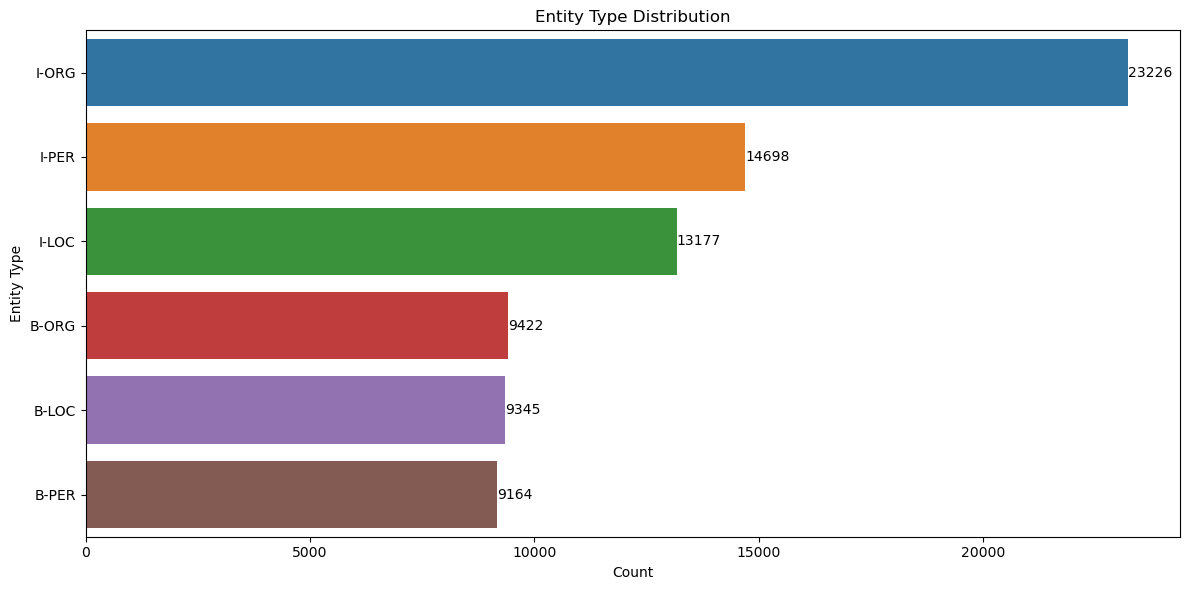

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each entity type
entity_counts = df['ner_tags'].apply(lambda x: [tag for tag in x if tag != 0]).explode().value_counts()

# Map numeric encodings to actual entity labels
entity_counts_labeled = entity_counts.rename(index=label_mapping)

# Create a horizontal bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=entity_counts_labeled.values, y=entity_counts_labeled.index, orient='h')

# Customize the plot
plt.title('Entity Type Distribution')
plt.xlabel('Count')
plt.ylabel('Entity Type')

# Add count labels to the end of each bar
for i, v in enumerate(entity_counts_labeled.values):
    plt.text(v + 0.1, i, str(v), va='center')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


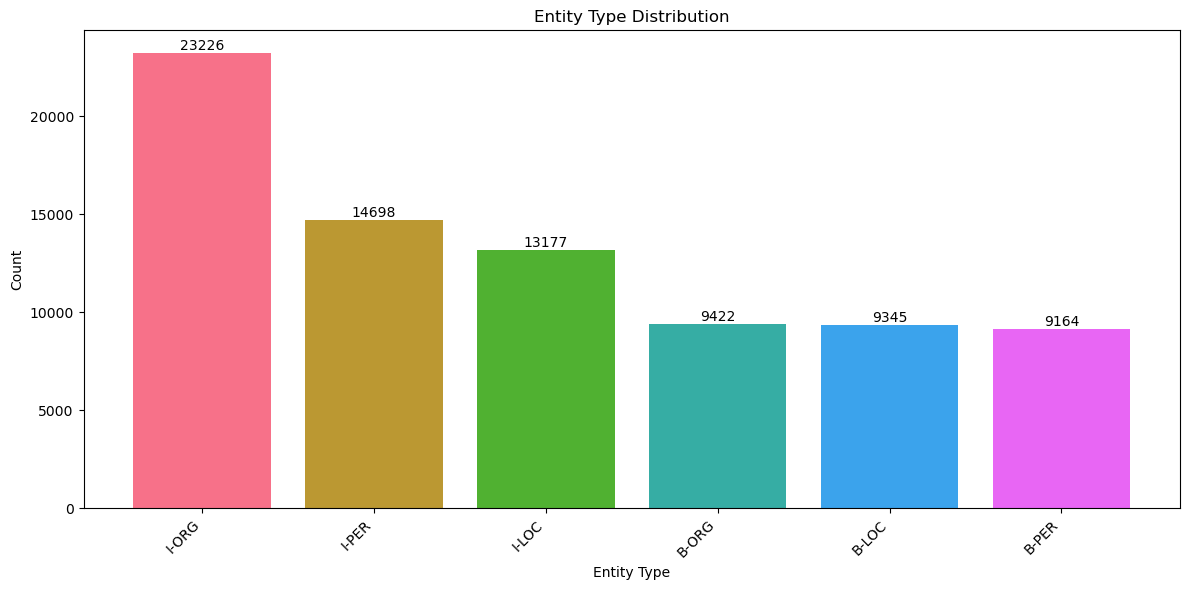

In [36]:
# alternative Darstellung :)
import matplotlib.pyplot as plt
import seaborn as sns

# First, let's create a mapping from numeric codes to entity labels
label_list = dataset['train'].features['ner_tags'].feature.names
label_mapping = {i: label for i, label in enumerate(label_list)}

# Now, let's map the entity counts to their actual labels
entity_counts_labeled = entity_counts.rename(index=label_mapping)

plt.figure(figsize=(12, 6))

# Use seaborn's color palette for distinct colors
colors = sns.color_palette("husl", len(entity_counts_labeled))

# Create the bar plot with different colors
bars = plt.bar(entity_counts_labeled.index, entity_counts_labeled.values, color=colors)

plt.title('Entity Type Distribution')
plt.xlabel('Entity Type')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [31]:
# Check for missing values to identify missing data in the dataset:
print(df.isnull().sum())


tokens             0
ner_tags           0
langs              0
spans              0
token_length       0
sentence_length    0
token_lengths      0
dtype: int64


In [32]:
# Examine unique tokens to give me an idea of the vocabulary size in the dataset:
unique_tokens = set([token for tokens in df['tokens'] for token in tokens])
print(f"Number of unique tokens: {len(unique_tokens)}")


Number of unique tokens: 33717


In [33]:
# Analyze sentence length distribution to get insight on the length of sentences in the dataset:
df['sentence_length'] = df['tokens'].apply(lambda x: len(x))
print(df['sentence_length'].describe())


count    20000.000000
mean         8.019700
std          6.678506
min          2.000000
25%          5.000000
50%          6.000000
75%          9.000000
max        439.000000
Name: sentence_length, dtype: float64
